In [1]:
import pandas as pd
import matplotlib.pyplot as plt
cpd = pd.read_csv('./cpd_data/all_data.csv', index_col=0)
# check for nan values
cpd.isnull().sum()
# fill nan values with 0
# cpd[['StartHesitation', 'Turn', 'Walking']] = cpd[['StartHesitation', 'Turn', 'Walking']].fillna(method='ffill')
# check for nan values
cpd.isnull().sum()

KeyboardInterrupt: 

In [ ]:
import gc
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
# Select the input columns: 'AccV', 'AccML', 'AccAP'
input_data = cpd[['SeriesId', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking']]
input_data = reduce_mem_usage(input_data)
del cpd
gc.collect()


/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Mem. usage decreased to 373.10 Mb (70.3% reduction)


/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int8)
/var/folders/wh/srwjqw_j5gsbl1y7xdb9jc900000gn/T/ipykernel_37832/2817975907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

0

In [ ]:
# Calculate the number of data points for each series
series_lengths = input_data.groupby('SeriesId').size()

# Choose a threshold for separating short and long series
# Here we use the median length as an example
threshold = series_lengths.median()

# Identify short and long series
short_series_ids = series_lengths[series_lengths <= threshold].index
long_series_ids = series_lengths[series_lengths > threshold].index

# Split the dataframe into two based on these IDs
defog_data = input_data[input_data['SeriesId'].isin(short_series_ids)]
tdcsfog_data = input_data[input_data['SeriesId'].isin(long_series_ids)]

In [ ]:
input_data = tdcsfog_data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming train_data and test_data are Pandas DataFrame

# Select columns to scale
columns_to_scale = ['AccV', 'AccML', 'AccAP']

# Initialize a new StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
input_data[columns_to_scale] = scaler.fit_transform(input_data[columns_to_scale])

In [2]:
import numpy as np
import gc
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(42)

# set device
device = torch.device('mps')

# Create a simple LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    # pass through the layers above
    def forward(self, x):
        output, _ = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc(torch.relu(output))
        return output

# Define some example parameters (you should adjust them according to your dataset)
input_size = 3    # Number of input features (e.g., AccV, AccML, AccAP)
hidden_size = 9 # Number of hidden units in LSTM
num_layers = 1    # Number of LSTM layers
output_size = 3   # Number of output units (e.g., StartHesitation, Turn, Walking)

# Create model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

# compute the number of samples for each class
n_samples = [len(input_data[input_data['StartHesitation'] == 0]),
             len(input_data[input_data['StartHesitation'] == 1]),
             len(input_data[input_data['Turn'] == 0]),
             len(input_data[input_data['Turn'] == 1]),
             len(input_data[input_data['Walking'] == 0]),
             len(input_data[input_data['Walking'] == 1])]

n_classes = 2

# calculate class weights
weights = torch.tensor(n_samples, dtype=torch.float) 
weights = weights / torch.sum(weights)  # normalize so that sum of weights equals 1
weights = 1. / weights  # inverse to assign higher weights to minority classes
weights = weights / torch.sum(weights)  # normalize again to ensure weights sum to 1

# use the weights in the CrossEntropyLoss
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

def create_sequences(data, seq_length):
    sequences = []
    targets = []
    unique_series = data['SeriesId'].unique()

    for series in unique_series:
        sub_df = data[data['SeriesId'] == series]
        for i in range(len(sub_df) - seq_length):
            sequences.append(sub_df.iloc[i:i + seq_length][['AccV', 'AccML', 'AccAP']].values)
            targets.append(sub_df.iloc[i + seq_length][['StartHesitation', 'Turn', 'Walking']].values)

    return np.array(sequences), np.array(targets)

seq_length = 100

# Split unique SeriesIds into train and test sets
unique_series_ids = input_data['SeriesId'].unique()
train_series_ids, test_series_ids = train_test_split(unique_series_ids, test_size=0.3, random_state=42)

# Create train and test sets based on the split SeriesIds
train_data = input_data[input_data['SeriesId'].isin(train_series_ids)]
test_data = input_data[input_data['SeriesId'].isin(test_series_ids)]

# Create train and test sequences
train_sequences, train_targets = create_sequences(train_data, seq_length)
test_sequences, test_targets = create_sequences(test_data, seq_length)

np.save('sequences/train_sequences_tdcsfog.npy', train_sequences)
np.save('sequences/train_targets_tdcsfog.npy', train_targets)
np.save('sequences/test_sequences_tdcsfog.npy', test_sequences)
np.save('sequences/test_targets_tdcsfog.npy', test_targets)

In [4]:
# load the sequences
import numpy as np
train_sequences = np.load('sequences/train_sequences_tdcsfog.npy', allow_pickle=True)
train_targets = np.load('sequences/train_targets_tdcsfog.npy', allow_pickle=True)
test_sequences = np.load('sequences/test_sequences_tdcsfog.npy', allow_pickle=True)
test_targets = np.load('sequences/test_targets_tdcsfog.npy', allow_pickle=True)

In [5]:
# ensure the type of the data is correct
from torch.utils.data import TensorDataset, DataLoader
train_sequences = train_sequences.astype(np.float16)
train_targets = train_targets.astype(np.float16)
test_sequences = test_sequences.astype(np.float16)
test_targets = test_targets.astype(np.float16)

train_sequences_tensor = torch.tensor(train_sequences, dtype=torch.float32)
train_targets_tensor = torch.tensor(train_targets, dtype=torch.float32)

test_sequences_tensor = torch.tensor(test_sequences, dtype=torch.float32)
test_targets_tensor = torch.tensor(test_targets, dtype=torch.float32)

train_dataset = TensorDataset(train_sequences_tensor, train_targets_tensor)
test_dataset = TensorDataset(test_sequences_tensor, test_targets_tensor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

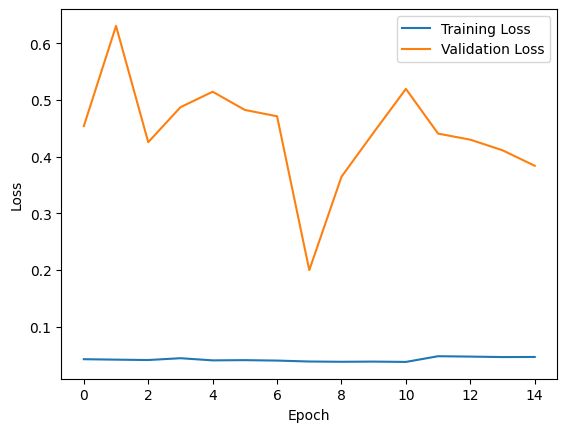

KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

num_epochs = 30
losses_epoch_train = []
losses_epoch_val = []

for epoch in range(num_epochs):
    losses_per_epoch_train = []
    losses_per_epoch_val = []
    lr = 0.02
    if epoch > 5:
        lr = 0.01
    if epoch > 20:
        lr = 0.005
    if epoch > 25:
        lr = 0.001

    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for sequences, targets in train_loader:
        sequences = sequences.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(sequences)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses_per_epoch_train.append(loss.item())
    losses_epoch_train.append(np.mean(losses_per_epoch_train))

    # Validation loop
    for sequences, targets in test_loader:
        sequences = sequences.to(device)
        targets = targets.to(device)

        with torch.no_grad():
            outputs = model(sequences)
            loss = criterion(outputs, targets)

            losses_per_epoch_val.append(loss.item())
    losses_epoch_val.append(np.mean(losses_per_epoch_val))

    clear_output(wait=True)
    plt.plot(range(len(losses_epoch_train)), losses_epoch_train, label='Training Loss')
    plt.plot(range(len(losses_epoch_val)), losses_epoch_val, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [ ]:
import os

# Create a directory to save the model weights
model_dir = 'model_weights'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# save the model
torch.save(model.state_dict(), os.path.join(model_dir, 'lstm_model_tdcsfog.pt'))


In [ ]:
import gc
import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
import os
import pandas as pd

def unify_acceleration_units(data):
    g_to_ms2 = 9.81
    data.loc[data['Source'].isin(['defog', 'notype']), ['AccV', 'AccML', 'AccAP']] *= g_to_ms2
    return data

def read_and_process_file(file_path, source):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(file_name)
    data = pd.read_csv(file_path)
    data['Id'] = file_name + '_' + data['Time'].astype(str)
    data['Source'] = source
    data['SeriesId'] = file_name
    return data

def read_all_files_in_folder(folder_path, source):
    files = os.listdir(folder_path)
    data = pd.concat([read_and_process_file(os.path.join(folder_path, file), source) for file in files], ignore_index=True)
    return data

def apply_change_point_detection(data, columns=['AccV', 'AccML', 'AccAP'], pen=200, jump=200):

    # Iterate through the unique SeriesId values
    for series_id in data['SeriesId'].unique():
        # Extract the data for the current SeriesId
        series_data = data[data['SeriesId'] == series_id]
        if len(series_data) > 9000:
            downsample_factor = 50  # Modify this value to change the downsampling rate
        if len(series_data) < 9000:
            downsample_factor = 5
        downsampled_data = series_data.iloc[::downsample_factor, :].reset_index(drop=True)

        for col in columns:
            signal = downsampled_data[col].values
            algo = rpt.Pelt(model="rbf", jump=jump).fit(signal)
            result = algo.predict(pen=pen)
            print(result)

            if len(result) > 1:
                for idx, (start, end) in enumerate(zip(result[:-1], result[1:])):
                    if idx % 2 == 0:
                        start_original = start * downsample_factor
                        end_original = end * downsample_factor
                        data.loc[(data['SeriesId'] == series_id) & data['Time'].between(start_original, end_original - 1), 'd' + col] = 1

                # Check if there's an odd number of change points and if the last one is within 20% of the end of the data
                if len(result) % 2 == 1 and result[-1] >= (0.8 * len(downsampled_data)):
                    start_original = result[-1] * downsample_factor
                    end_original = len(series_data)
                    data.loc[(data['SeriesId'] == series_id) & data['Time'].between(start_original, end_original - 1), 'd' + col] = 1

    return data

folders = os.listdir('./test/')
test_dfs = []
for folder in folders:
    test_dfs.append(read_all_files_in_folder(f'./test/{folder}', f'{folder}'))
# test_defog = read_all_files_in_folder('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/defog', 'defog')
# test_tdcsfog = read_all_files_in_folder('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/test/tdcsfog', 'tdcsfog')

test_data = pd.concat(test_dfs, ignore_index=True)
del test_dfs
gc.collect()
test_data = unify_acceleration_units(test_data)
# test_data[['dAccV', 'dAccML', 'dAccAP']] = 0
# test_data = apply_change_point_detection(test_data, pen=125, jump=300)

# create some new features
# test_data['AccAPdp'] = test_data['AccAP'] + test_data['dAccAP']
# test_data['AccMLdp'] = test_data['AccML'] + test_data['dAccML']
# test_data['AccVdc'] = test_data['AccV'] * test_data['dAccV']

# drop the extra columns
# test_data.drop(['dAccV', 'dAccML', 'dAccAP'], axis=1, inplace=True)

test_data = test_data[['AccV', 
                       'AccML', 
                       'AccAP', 
#                        'AccAPdp', 
#                        'AccMLdp', 
#                        'AccVdc', 
                       'SeriesId',
                       'Id',
                       'Time',
                      ]]
test_data.reset_index(drop=True, inplace=True)
test_data = reduce_mem_usage(test_data)

02ab235146
003f117e14
Mem. usage decreased to 14.34 Mb (-9.4% reduction)


In [ ]:
# load model
# model = torch.load('./model.pth')


In [ ]:
def create_test_sequences(data, seq_length):
    sequences = [data.iloc[i:i + seq_length].values for i in range(len(data) - seq_length)]
    time_info = [data.iloc[i + seq_length][['SeriesId', 'Time']] for i in range(len(data) - seq_length)]
    sequences = np.array(sequences)[:, :, :3]
    return sequences, time_info

# Define your two models: model_short and model_long
model_short = ...
model_long = ...

# Compute the median number of data points per series
medians = test_data.groupby("SeriesId").size().median()

prediction_list = []
time_info_list = []

test_ids = test_data['SeriesId'].unique()

for series_id in test_ids:

    # Select a model depending on the length of the series
    if len(test_data[test_data['SeriesId'] == series_id]) <= medians:
        model = model_short
    else:
        model = model_long

    model.eval()

    series_data = test_data[test_data['SeriesId'] == series_id].drop(columns=['Id'])
    sequences, time_info = create_test_sequences(series_data, seq_length)

    sequences = np.array(sequences)
    test_sequences = torch.tensor(sequences, dtype=torch.float32, device=device)

    with torch.no_grad():
        outputs = model(test_sequences)
        output_probs = torch.sigmoid(outputs).cpu().numpy()

    threshold = 0.5
    y_pred = (output_probs > threshold).astype(int)
    prediction_list.append(y_pred)
    time_info_list.extend(time_info)

all_predictions = np.concatenate(prediction_list, axis=0)

time_info_df = pd.DataFrame(time_info_list, columns=['SeriesId', 'Time'])
time_info_df['SeriesId_Time'] = time_info_df['SeriesId'].astype(str) + "_" + time_info_df['Time'].astype(str)

predictions_df = pd.DataFrame(all_predictions, columns=['StartHesitation', 'Turn', 'Walking'])

# Pad the start of the predictions DataFrame by seq_length
predictions_df = pd.DataFrame(index=range(seq_length), columns=['StartHesitation', 'Turn', 'Walking']).append(predictions_df).reset_index(drop=True)

# Interpolate the values for the targets
for column in predictions_df.columns:
    predictions_df[column] = pd.to_numeric(predictions_df[column])
    predictions_df[column] = predictions_df[column].interpolate()

# Verify the DataFrame
print(predictions_df)

result_df = pd.concat([time_info_df['SeriesId_Time'], predictions_df], axis=1)

NameError: name 'model' is not defined

In [ ]:
# plot true vs predicted
fig, ax = plt.subplots(3, 1, figsize=(20, 10))
for i, col in enumerate(['StartHesitation', 'Turn', 'Walking']):
    ax[i].scatter(range(len(result_df[col])), result_df[col], label='Predicted')
    ax[i].scatter(range(len(test_data[test_data['SeriesId'] == 0][col].values)), test_data[test_data['SeriesId'] == 0][col].values, label='True')
    ax[i].set_title(col)
    ax[i].legend()
plt.show()

* introduce padding in the predictions
* variable sequence length
* downsample the longer series so all are the same length then use batches, then in predicting I'll need to have kept track of the seriesids and times and interpolate between them
* variable learning rate
* folding and ensemble
* unlabelled dataset